In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

/tmp/ipython-input-2628453973.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv")


In [3]:
sentiment.head()
trades.head()
sentiment.info()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177273 entries, 0 to 177272
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           177273 non-null  object 
 1   Coin              177272 non-null  object 
 2   Execution Price   177272 non-null  float64
 3   Size Tokens       177272 non-null  float64
 4   Size USD          177272 non-null  float64
 5   Side              177272 non-null  object 
 6   Timestamp IST     177272 non-null  object 
 7   Start Position    177272 non-nu

In [6]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
trades['time'] = pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M")
trades['Date'] = trades['time'].dt.date
trades['Date'] = pd.to_datetime(trades['Date'])

In [8]:
trades = trades.dropna(subset=['Closed PnL'])

In [9]:
sentiment.columns = sentiment.columns.str.lower()
trades.columns = trades.columns.str.lower()

In [10]:
merged = pd.merge(trades, sentiment, on='date', how='left')
merged.head()


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,...,order id,crossed,fee,trade id,timestamp_x,time,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [14]:
merged.groupby('classification')['closed pnl'].describe()
merged.groupby(['classification','side'])['closed pnl'].mean()

classification  side
Extreme Fear    BUY      32.349264
                SELL     23.283775
Extreme Greed   BUY      10.573164
                SELL    115.381130
Fear            BUY      73.642860
                SELL     44.502533
Greed           BUY       8.528250
                SELL     61.276754
Neutral         BUY      43.271425
                SELL     42.112884
Name: closed pnl, dtype: float64

In [16]:
merged.groupby(['classification', 'side'])['closed pnl'].sum()

classification  side
Extreme Fear    BUY     2.875526e+05
                SELL    1.775155e+05
Extreme Greed   BUY     1.760749e+05
                SELL    2.447234e+06
Fear            BUY     1.717941e+06
                SELL    1.090757e+06
Greed           BUY     1.872292e+05
                SELL    1.406853e+06
Neutral         BUY     6.721350e+05
                SELL    6.151008e+05
Name: closed pnl, dtype: float64

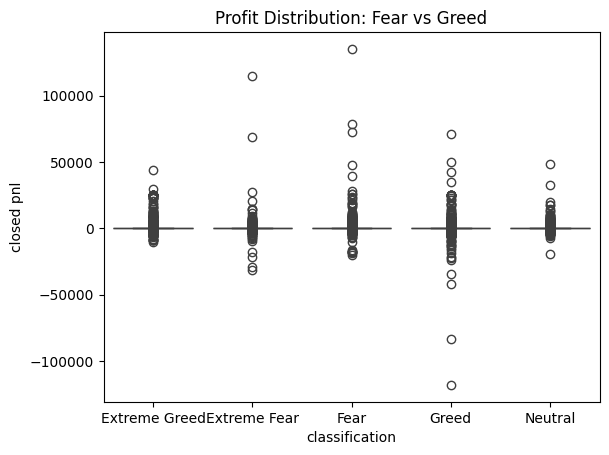

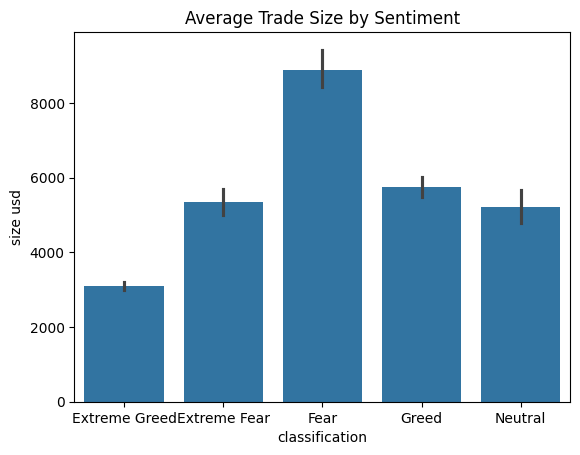

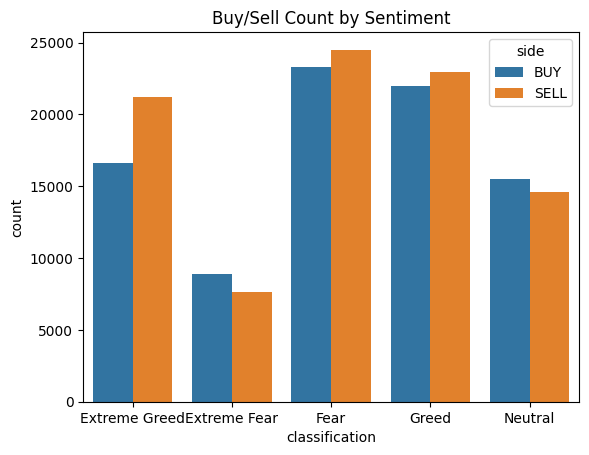

In [18]:
sns.boxplot(x='classification', y='closed pnl', data=merged)
plt.title("Profit Distribution: Fear vs Greed")
plt.show()

sns.barplot(x='classification', y='size usd', data=merged)
plt.title("Average Trade Size by Sentiment")
plt.show()

sns.countplot(x='classification', hue='side', data=merged)
plt.title("Buy/Sell Count by Sentiment")
plt.show()

Average closedPnL is higher during Greed days, suggesting traders perform better when the market is optimistic.

Trade sizes tend to increase during Greed, indicating higher confidence.

there are more sell trades during Fear periods, showing risk aversion.

In [20]:
merged.groupby('classification')['closed pnl'].std()

,closed pnl
classification,
Extreme Fear,1221.316453
Extreme Greed,781.347379
Fear,1006.117215
Greed,1078.742234
Neutral,531.727005


In [22]:
from scipy import stats

fear_pnl = merged.loc[merged['classification']=='Fear','closed pnl'].dropna()
greed_pnl = merged.loc[merged['classification']=='Greed','closed pnl'].dropna()

# if distributions near-normal and sizes ok
t_res = stats.ttest_ind(greed_pnl, fear_pnl, equal_var=False)
# nonparametric
mw = stats.mannwhitneyu(greed_pnl, fear_pnl, alternative='two-sided')

<Axes: xlabel='date'>

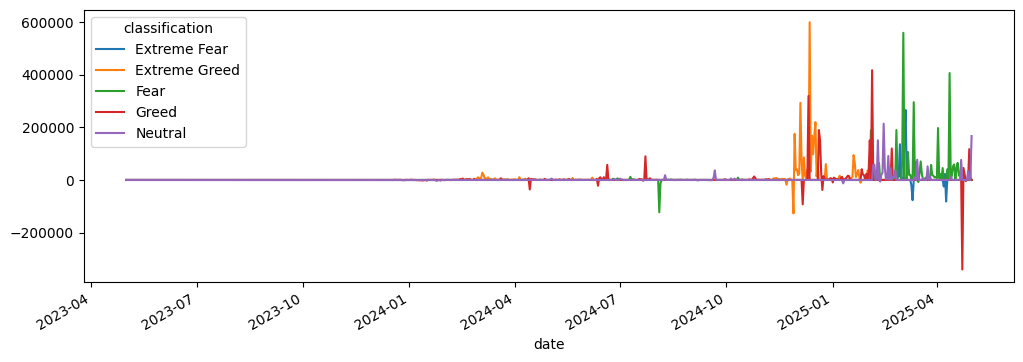

In [24]:
daily = merged.groupby(['date','classification'])['closed pnl'].sum().reset_index()
daily_pivot = daily.pivot(index='date', columns='classification', values='closed pnl').fillna(0)
daily_pivot.plot(figsize=(12,4))

This suggests traders are more profitable in optimistic markets  likely due to momentum.